# Fourier Series Tutorial

## What is a Fourier Series

A Fourier Series is a function f represented as an infinite series of sines and cosines.

$$f(x)=a_0+a_1cos x+a_2cos 2x+...a_kcos kx+a_1sin x+a_2sin 2x+...a_ksin kx$$

It can be used to create or recreate any periodic function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

## Creating a Square Wave

A square wave is defined by the piecewise function

$$ \begin{cases} 
      0 & -{\pi}\leq x < 0 \\
      1 & 0\leq x < {\pi} \\
   \end{cases}
$$

and

$$f(x+2{\pi})=f(x)$$

Then we create the square wave using the function

$$S_n(x) = \frac{1}{2}+\frac{2}{\pi}sin(x)+\frac{2}{3\pi}sin(3x)+...+\frac{2}{n\pi}sin(nx)$$

where n is always odd.

Beginning with one sine wave the graph looks like this

In [17]:
def square(x,n):
    j = 0.5
    
    for i in range(0,n+1):
        if i%2 == 1:
            j = j + (2/(i*np.pi))*np.sin(i*x)
        else:
            j = j

    return j

In [18]:
hdata = np.linspace(0,2*np.pi,100)

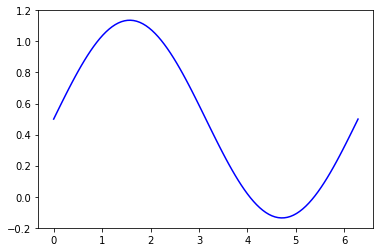

In [19]:
x = square(hdata,1)

plt.plot(hdata, x, 'b-')

By adding another sine wave we see the square wave begins to take shape

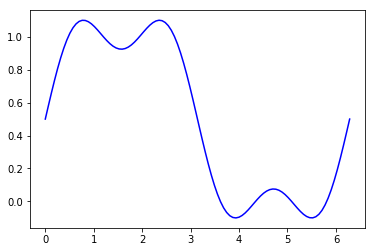

In [20]:
x = square(hdata,3)

plt.plot(hdata, x, 'b-')

As we add more waves the square wave becomes clearer and clearer.  The example below has 5 sine waves.

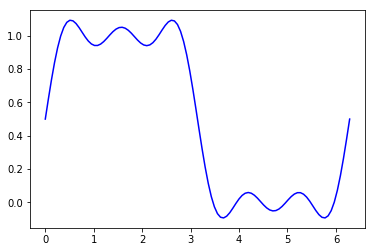

In [21]:
x = square(hdata,5)

plt.plot(hdata, x, 'b-')

Here we have 9 sine waves.

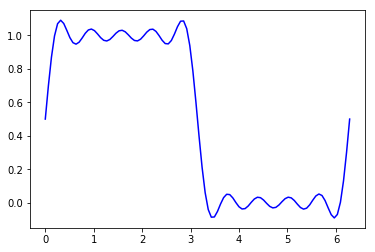

In [22]:
x = square(hdata,9)

plt.plot(hdata, x, 'b-')

Here is a square wave that is created by using a Fourier Series of 1000 pieces from the $S_n(x)$ function.

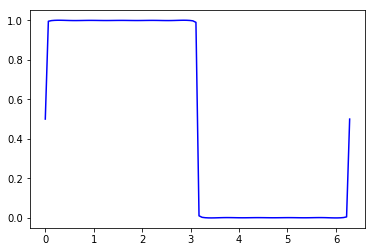

In [23]:
x = square(hdata,1000)

plt.plot(hdata, x, 'b-')

## Creating A Triangle Wave

We are also able to create other waves using a Fourier Series. Here I will create a triangle wave.

In [34]:
def triangle(x,n):
    j = 0.5
    
    for i in range(0,n+1):
        if i%2 == 1:
            j = j - (4/((2*i-1)**2*np.pi**2))*np.cos((2*i-1)*np.pi*x)
        else:
            j = j

    return j

It takes a large Fourier Series to obtain a trianglular shape.  This plot below is using a Fourier transform that is iterating 10 million times. It is still not a completely clear, but that is as close to a perfect triangle as the program will get.  Even after iterating 50 million times the same shape emerged.

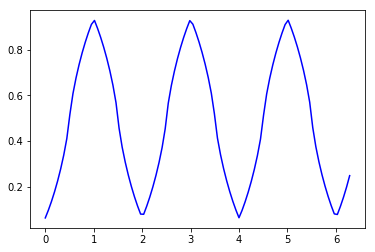

In [40]:
x = triangle(hdata,10000000)

plt.plot(hdata, x, 'b-')

## Fitting Data with a Fourier Series

In this example we are using a set of data with voltage as a function of time from `dataset.txt`.  We are using the `curve_fit` function to find the best fit curve and showing  the parameters of the equation

$$V(t)=a_1\sin(\omega t)+a_2\sin(2\omega t)+a_3\sin(3\omega t)+a_4\sin(4\omega t)$$

In this equation we found the amplitudes and angular frequencies of the sine waves that make up the wave in the given `dataset.txt.`  In the graph below the red is the data with the blue on top being the best fit curve created by the Fourier Series.

a=0.249  b=0.750  c=0.500  d=0.0000192  w=1256.628


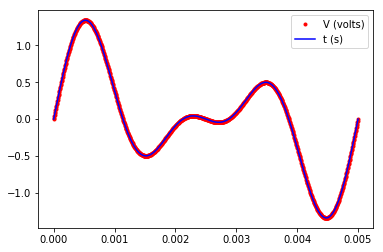

In [6]:
def voltage(x,a,b,c,d,w):
    return a*np.sin(w*x)+b*np.sin(2*w*x)+c*np.sin(3*w*x)+d*np.sin(4*w*x)

data = pd.read_table('dataset.txt')

p0 = [1,1,1,1,2*np.pi/.005]

time = data['t (s)']
volts = data['V (volts)']

parameters, stats = curve_fit(voltage, time, volts, p0)
#print(parameters)
model = voltage(time, *parameters)

#print(*parameters)
print('a=0.249  b=0.750  c=0.500  d=0.0000192  w=1256.628')

plt.plot(time,volts, 'r.')
plt.plot(time, model, 'b-')
plt.legend()

## Sources

Stewart, James. Calculus: Early Transcendentals. Cengage Learning, 2016.
https://www.stewartcalculus.com/data/CALCULUS%20Early%20Transcendentals/upfiles/FourierSeries5ET.pdf